In [853]:
from scipy import stats
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dateutil.parser as dp
import pytz
import numpy as np
import datetime
from scipy import stats

In [854]:
#readinf the dataframes
df = pd.read_csv (r'./data/avro-issues.csv')
df_transition = pd.read_csv (r'./data/avro-transitions.csv')
df_day_count = pd.read_csv (r'./data/avro-daycounts.csv')

In [855]:
df.describe()

,vote_count,comment_count,description_length,summary_length,watch_count,days_in_current_status
count,2166.000000,2166.000000,2073.000000,2166.000000,2166.000000,2166.000000
mean,0.281625,5.716066,697.887120,52.825946,2.337950,1884.993330
std,1.354866,7.595926,1054.484083,20.968528,3.135038,972.131416
min,0.000000,0.000000,15.000000,8.000000,0.000000,2.025288
25%,0.000000,2.000000,182.000000,38.000000,1.000000,926.980462
50%,0.000000,4.000000,353.000000,51.000000,2.000000,2038.413314
75%,0.000000,7.000000,788.000000,65.000000,3.000000,2786.419177
max,36.000000,97.000000,17439.000000,186.000000,74.000000,3288.421389


In [856]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   status                  2166 non-null   object 
 1   priority                2166 non-null   object 
 2   updated                 2166 non-null   object 
 3   issue_type              2166 non-null   object 
 4   reporter                2166 non-null   object 
 5   created                 2166 non-null   object 
 6   resolutiondate          1515 non-null   object 
 7   vote_count              2166 non-null   int64  
 8   project                 2166 non-null   object 
 9   assignee                1422 non-null   object 
 10  comment_count           2166 non-null   int64  
 11  key                     2166 non-null   object 
 12  description_length      2073 non-null   float64
 13  summary_length          2166 non-null   int64  
 14  watch_count             2166 non-null   

In [857]:
df_transition.head()

,status,updated,from_status,reporter,when,days_in_from_status,who,to_status,assignee,key,...,project,created,transition,resolutiondate,comment_count,priority,vote_count,issue_type,watch_count,resolution
0,In Progress,2018-04-21T15:44:36.749+0000,NaN,rlenferink,2018-04-17T21:53:05.730+0000,NaN,rlenferink,Open,rlenferink,AVRO-2171,...,AVRO,2018-04-17T21:53:05.730+0000,Non-existent to Open,NaN,1,Major,0,Improvement,1,NaN
1,In Progress,2018-04-21T15:44:36.749+0000,Open,rlenferink,2018-04-18T01:33:49.088+0000,0.153280,busbey,Patch Available,rlenferink,AVRO-2171,...,AVRO,2018-04-17T21:53:05.730+0000,Open to Patch Available,NaN,1,Major,0,Improvement,1,NaN
2,In Progress,2018-04-21T15:44:36.749+0000,Patch Available,rlenferink,2018-04-21T15:44:36.753+0000,3.590829,busbey,In Progress,rlenferink,AVRO-2171,...,AVRO,2018-04-17T21:53:05.730+0000,Patch Available to In Progress,NaN,1,Major,0,Improvement,1,NaN
3,In Progress,2018-04-21T15:42:40.935+0000,NaN,rlenferink,2018-04-17T21:47:11.197+0000,NaN,rlenferink,Open,rlenferink,AVRO-2170,...,AVRO,2018-04-17T21:47:11.197+0000,Non-existent to Open,NaN,1,Minor,0,Improvement,2,NaN
4,In Progress,2018-04-21T15:42:40.935+0000,Open,rlenferink,2018-04-18T01:33:19.205+0000,0.157037,busbey,Patch Available,rlenferink,AVRO-2170,...,AVRO,2018-04-17T21:47:11.197+0000,Open to Patch Available,NaN,1,Minor,0,Improvement,2,NaN


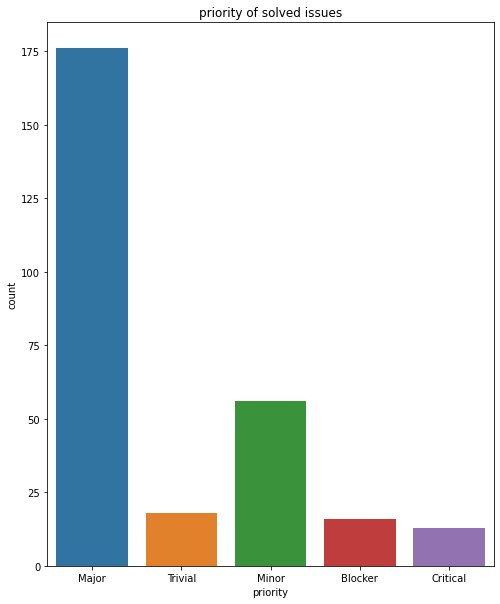

In [858]:
resolved_df = df[df['status'] == 'Resolved']
ax = sns.countplot(x="priority",  data=resolved_df).set_title('priority of solved issues')
plt.show()

In [859]:
resolved_df = df[df['status'] == 'Resolved'].describe();
resolved_df; 

#few of them were solved

In [861]:
df_with_solutiondata = df[df["resolutiondate"].notnull()]
df_with_solutiondata

#1515 are thw numbers of unique key about the solved issues

#so there is a discrepancy between solved issues and issues with resolution date

,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,project,assignee,comment_count,key,description_length,summary_length,watch_count,resolution,days_in_current_status
2,Resolved,Major,2018-04-24T06:34:58.782+0000,Improvement,jmukesh,2018-04-06T13:45:28.721+0000,2018-04-24T06:34:58.762+0000,0,AVRO,NaN,0,AVRO-2169,1062.0,75,1,Not A Bug,2.025288
3,Resolved,Major,2018-04-24T06:34:37.360+0000,Bug,jmukesh,2018-04-05T13:21:01.183+0000,2018-04-24T06:34:37.339+0000,0,AVRO,NaN,1,AVRO-2168,272.0,64,1,Not A Bug,2.025536
4,Resolved,Major,2018-04-24T06:34:15.849+0000,Bug,jmukesh,2018-04-04T16:39:43.364+0000,2018-04-24T06:34:15.829+0000,0,AVRO,NaN,0,AVRO-2167,674.0,53,1,Not A Bug,2.025785
5,Resolved,Major,2018-04-24T06:32:37.556+0000,Bug,jmukesh,2018-04-04T16:29:37.306+0000,2018-04-24T06:32:37.535+0000,0,AVRO,NaN,1,AVRO-2166,1043.0,39,2,Not A Bug,2.026923
14,Resolved,Trivial,2018-03-14T16:45:08.597+0000,Bug,maxenglander,2018-03-09T06:18:47.199+0000,2018-03-14T16:45:08.577+0000,0,AVRO,maxenglander,3,AVRO-2157,825.0,82,2,Fixed,42.601563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2161,Closed,Major,2009-07-14T22:50:08.305+0000,Test,sharadag,2009-04-11T10:54:25.016+0000,2009-04-15T05:27:21.612+0000,0,AVRO,sharadag,6,AVRO-5,50.0,49,0,Fixed,3207.348097
2162,Closed,Major,2009-07-14T22:50:08.238+0000,Bug,phunt,2009-04-10T23:20:38.998+0000,2009-04-14T22:12:34.962+0000,0,AVRO,phunt,2,AVRO-4,494.0,36,0,Fixed,3207.348098
2163,Closed,Critical,2009-07-14T22:50:08.150+0000,Bug,phunt,2009-04-10T20:14:54.370+0000,2009-04-10T23:31:56.052+0000,0,AVRO,cutting,4,AVRO-3,262.0,54,0,Fixed,3207.348099
2164,Closed,Major,2009-07-14T22:50:08.061+0000,Improvement,cutting,2009-04-09T22:34:55.599+0000,2009-06-02T19:04:10.508+0000,0,AVRO,cutting,7,AVRO-2,204.0,22,1,Fixed,3207.348100


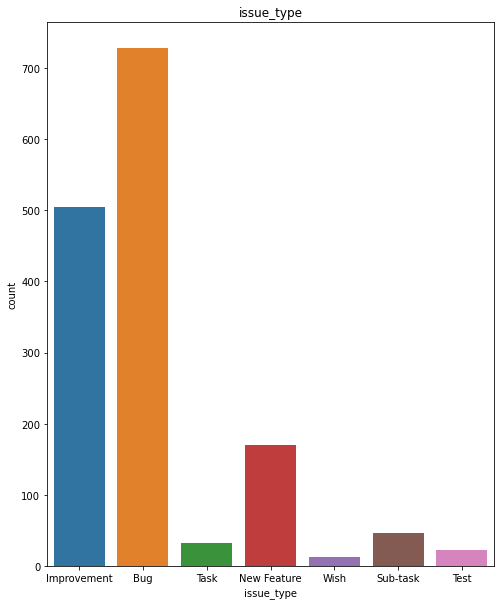

In [862]:
col = "issue_type"
ax = sns.countplot(x=col,  data=df_with_solutiondata).set_title(col)
#improvement and bug are the most present issue type

In [863]:
#if we merge transitions with solved issues, we increase the number of available data for training
merged_df = df_with_solutiondata.merge(df_transition,how="inner",on="key",suffixes=('', '_drop'))
# merged_df.info()
merged_df.drop([col for col in merged_df.columns if 'drop' in col], axis=1, inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5412 entries, 0 to 5411
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   status                  5412 non-null   object 
 1   priority                5412 non-null   object 
 2   updated                 5412 non-null   object 
 3   issue_type              5412 non-null   object 
 4   reporter                5412 non-null   object 
 5   created                 5412 non-null   object 
 6   resolutiondate          5412 non-null   object 
 7   vote_count              5412 non-null   int64  
 8   project                 5412 non-null   object 
 9   assignee                4735 non-null   object 
 10  comment_count           5412 non-null   int64  
 11  key                     5412 non-null   object 
 12  description_length      5155 non-null   float64
 13  summary_length          5412 non-null   int64  
 14  watch_count             5412 non-null   

In [722]:
merged_df["key"].nunique()
#to me this means we have transitions of the same issue which report the same end date. 
#The problem is that we can't have multiple rows with the same resolution date

1515

In [723]:
#we look for issues with multiple steps
merged_df["key"].value_counts()

AVRO-1614    12
AVRO-1551    10
AVRO-314     10
AVRO-152      8
AVRO-1660     7
             ..
AVRO-1809     2
AVRO-1411     2
AVRO-1708     2
AVRO-1686     2
AVRO-2081     2
Name: key, Length: 1515, dtype: int64

In [724]:
temp = merged_df[merged_df["key"] == "AVRO-1614"]
#this prove what I said before
temp["resolutiondate"].nunique()


1

In [883]:
#we create target to define how many hours,minutes and seconds were spent to find a solution to the problem
custom_df = merged_df
for index, row in merged_df.iterrows():
    

    t_current = datetime.datetime.strptime(row['when'], "%Y-%m-%dT%H:%M:%S.%f%z")
    t_created = datetime.datetime.strptime(row['created'], "%Y-%m-%dT%H:%M:%S.%f%z")
    t_solved = datetime.datetime.strptime(row['resolutiondate'], "%Y-%m-%dT%H:%M:%S.%f%z")
    sol_time_spent = t_solved - t_current
    time_passed_so_far = t_current - t_created
    
    t_passed_seconds = time_passed_so_far.total_seconds()
    t_spent_in_seconds = sol_time_spent.total_seconds()
    t_spent_in_minutes = t_spent_in_seconds/60    
    t_spent_in_hours = t_spent_in_minutes/60
    t_spent_in_days = t_spent_in_hours/24
    
    #day of week
    custom_df.loc[index,'weekday']  = t_current.weekday()
    custom_df.loc[index,'week_of_year'] = t_current.isocalendar()[1]
    custom_df.loc[index,'day'] = t_current.day
    custom_df.loc[index,'month'] = t_current.month
    custom_df.loc[index,'year'] = t_current.year
    #t_spent_in_month = t_spent_in_hours/30
    
    
    if(t_spent_in_seconds > 0):
        custom_df.loc[index,'sec_to_sol'] = t_spent_in_seconds
#         custom_df.loc[index,'min_to_sol'] = t_spent_in_minutes
#         custom_df.loc[index,'h_to_sol'] = t_spent_in_hours
#         custom_df.loc[index,'day_to_sol'] = t_spent_in_days
        
    else:
        #I noticed there are transitions in which the creation date is later than the solution date. I want to delete
        #those because it is useless
        custom_df.loc[index,'sec_to_sol'] = np.nan
#         custom_df.loc[index,'min_to_sol'] = np.nan
#         custom_df.loc[index,'h_to_sol'] = np.nan
#         custom_df.loc[index,'day_to_sol'] = np.nan
        
    if t_passed_seconds > 0:
        custom_df.loc[index,'sec_passed_so_far'] = t_passed_seconds
    else:
        custom_df.loc[index,'sec_passed_so_far'] = 0
custom_df.info()

#i don't include zero because log of zero

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5412 entries, 0 to 5411
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   status                  5412 non-null   object 
 1   priority                5412 non-null   object 
 2   updated                 5412 non-null   object 
 3   issue_type              5412 non-null   object 
 4   reporter                5412 non-null   object 
 5   created                 5412 non-null   object 
 6   resolutiondate          5412 non-null   object 
 7   vote_count              5412 non-null   int64  
 8   project                 5412 non-null   object 
 9   assignee                4735 non-null   object 
 10  comment_count           5412 non-null   int64  
 11  key                     5412 non-null   object 
 12  description_length      5155 non-null   float64
 13  summary_length          5412 non-null   int64  
 14  watch_count             5412 non-null   

In [884]:
#we just keep rows whose time spent to solve is greater than zero, ie not nan
custom_df = custom_df[custom_df["sec_to_sol"].notnull()]

In [885]:
#we have a problem of right skewdeness
#in order to solve the problem, we apply log transformation to the target variable
custom_df["sec_to_sol"].agg(['skew', 'kurtosis']).transpose()

skew         6.393048
kurtosis    50.819993
Name: sec_to_sol, dtype: float64

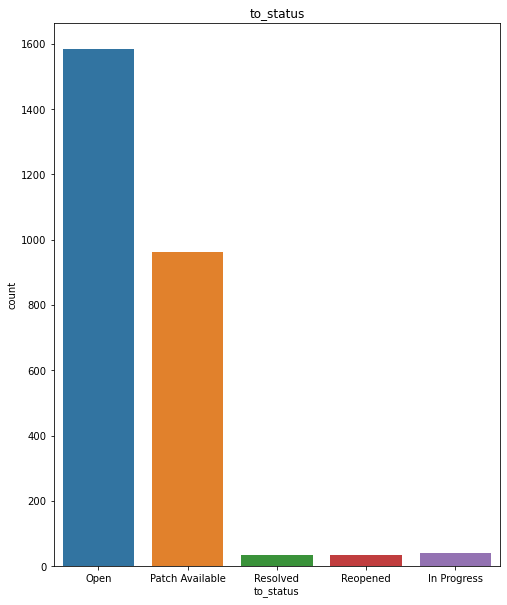

In [867]:
col = "to_status"
ax = sns.countplot(x=col,  data=custom_df).set_title(col)

In [731]:
# custom_df['weekday'] = custom_df['calendar_day'].apply(
#         lambda x: get_calender_day(x) )  


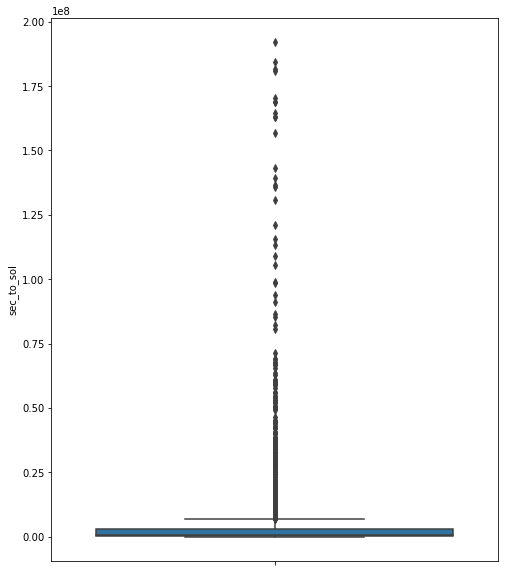

In [868]:
var = ["sec_to_sol"]#"min_to_sol","h_to_sol","day_to_sol"]
for v in var:
    ax = sns.boxplot(y=custom_df[v])
    plt.show()
    

C:\Users\gabri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


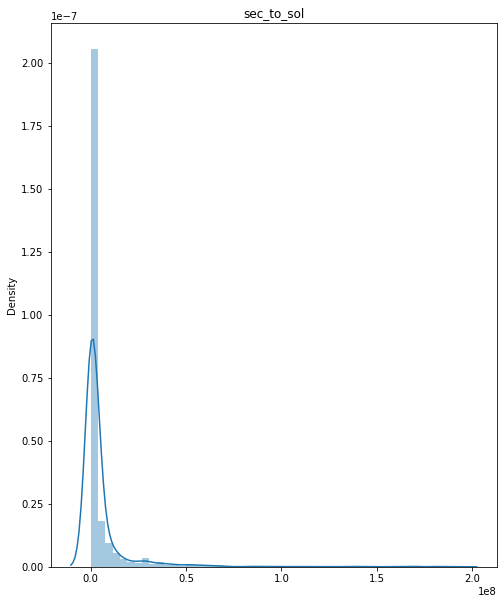

In [869]:
var = ["sec_to_sol"]#,"min_to_sol","h_to_sol","day_to_sol"]
for v in var:
    ax = sns.distplot(x= custom_df[v])
    plt.title(v)
    plt.show()
    

C:\Users\gabri\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


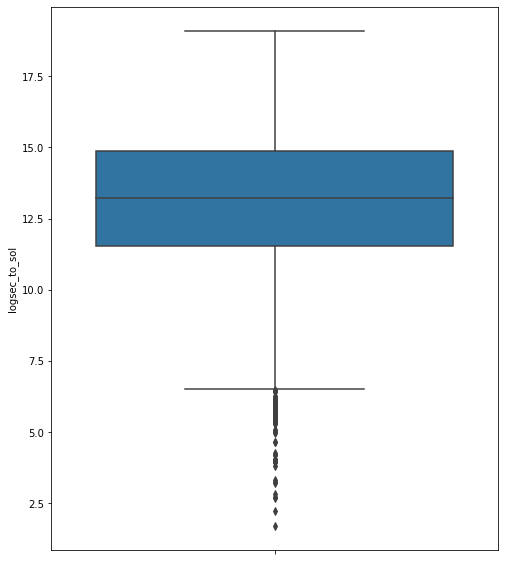

C:\Users\gabri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


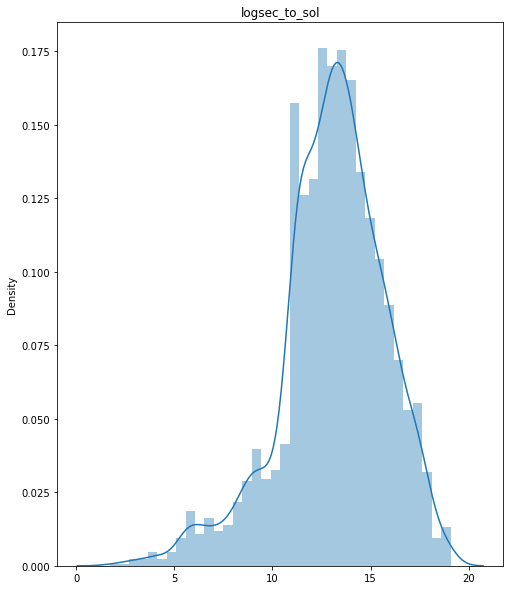

skew       -0.683872
kurtosis    1.054213
Name: logsec_to_sol, dtype: float64


In [886]:
#we apply log transform to get rid of the skewdness
var = ["sec_to_sol"]#,"min_to_sol","h_to_sol","day_to_sol"]
for v in var:
    custom_df['log'  + v] = np.log(custom_df[v])
    #boxplot
    ax = sns.boxplot(y=custom_df['log' + v])
    plt.show()
    
    ax = sns.distplot(x= custom_df['log' + v])
    plt.title('log' + v)
    plt.show()
    print(custom_df['log' + v].agg(['skew', 'kurtosis']).transpose())

In [735]:
#we may drop whatever is below ~ 6,25 (outliers) in order to better model fitting later on 
#(we would not be able to predict forecast on the first e^6,25 = 8,63 minutes). Is it a big problem?

C:\Users\gabri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\gabri\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\gabri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\gabri\anaconda3\lib\site-pack

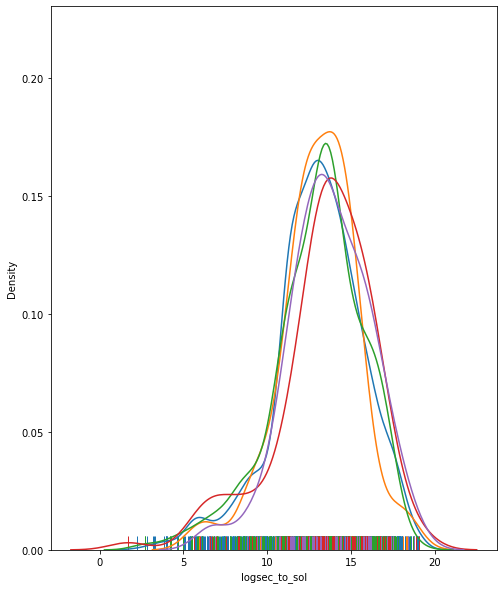

C:\Users\gabri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\gabri\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\gabri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\gabri\anaconda3\lib\site-pack

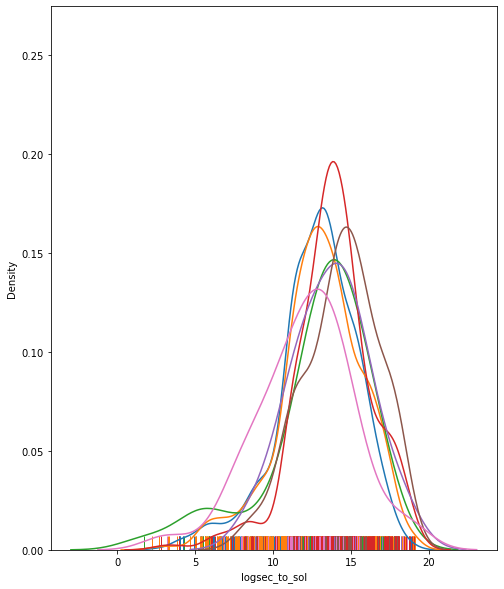

In [887]:
#i would delete everything below 
#for both the features, each categorical value share kind of the same distribution
[sns.distplot(custom_df[custom_df["priority"] == el]["logsec_to_sol"], hist=False, rug=True) for el in custom_df["priority"].unique()]
plt.show()
[sns.distplot(custom_df[custom_df["issue_type"] == el]["logsec_to_sol"], hist=False, rug=True) for el in custom_df["issue_type"].unique()]
plt.show()



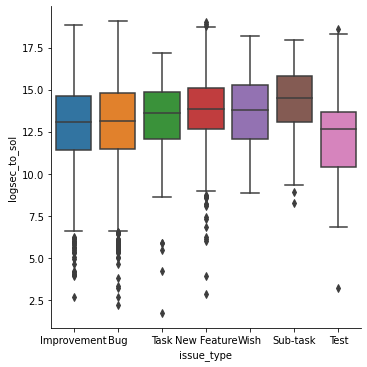

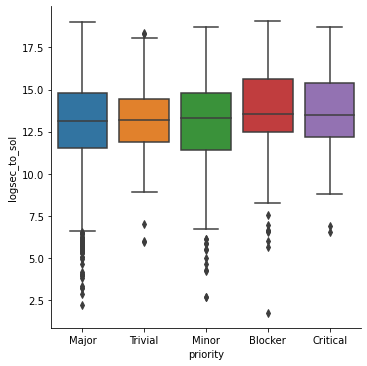

In [888]:
#box plot overallqual/saleprice
var = ["issue_type", "priority"]
for v  in var:
    sns.catplot(x=v, y="logsec_to_sol", kind="box", data=custom_df)
    plt.show()

In [889]:
# the idea of cutting belows ~6,25 persit since Improvement and Bug are the main issue type in the dataset

In [879]:
# custom_df["sec_to_sol"].describe()

# d = custom_df[custom_df["sec_to_sol"] > 0]


# d["log_h_to_sol"] = np.log(d['h_to_sol'])
# print(d["sec_to_sol"].describe())
# ax = sns.distplot(x=d["log_h_to_sol"] )
# plt.title("log_h_to_sol")
# plt.show()


# custom_df["sec_to_sol"]
custom_df.describe()

,vote_count,comment_count,description_length,summary_length,watch_count,days_in_current_status,days_in_from_status,days_since_open,weekday,week_of_year,day,month,year,sec_to_sol,sec_passed_so_far,logsec_to_sol,transictions_so_far
count,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2661.000000,2.661000e+03,2.661000e+03,2661.000000,2661.000000
mean,0.173995,7.458098,622.383799,51.671552,2.355881,2031.939585,18.402901,23.599097,2.465239,25.327696,15.300263,6.234123,2011.951898,5.464242e+06,2.038962e+06,13.071676,0.569335
std,0.798598,8.665561,1004.849030,20.526848,2.748341,935.190536,116.424295,131.415687,1.731837,15.845070,8.519175,3.609571,2.480590,1.692406e+07,1.135432e+07,2.675498,0.857181
min,0.000000,0.000000,15.000000,8.000000,0.000000,2.025288,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2009.000000,5.558000e+00,0.000000e+00,1.715238,0.000000
25%,0.000000,3.000000,161.000000,37.000000,0.000000,1371.454926,0.000000,0.000000,1.000000,11.000000,8.000000,3.000000,2010.000000,1.007204e+05,0.000000e+00,11.520103,0.000000
50%,0.000000,5.000000,326.000000,49.000000,2.000000,2262.267311,0.000000,0.000000,2.000000,25.000000,15.000000,6.000000,2011.000000,5.593877e+05,0.000000e+00,13.234598,0.000000
75%,0.000000,9.000000,646.000000,63.000000,4.000000,2946.597666,0.035873,0.108741,4.000000,40.000000,22.000000,9.000000,2014.000000,2.850684e+06,9.395185e+03,14.863070,1.000000
max,9.000000,84.000000,17439.000000,186.000000,33.000000,3207.348102,2175.533870,2175.533870,6.000000,53.000000,31.000000,12.000000,2018.000000,1.919659e+08,1.879661e+08,19.072828,9.000000


In [740]:
#the higher vote_count and watch_count, the less variance of time spent to solve 

In [890]:
#for each key of the resolved issues, we keep count of the previous transictions made so far
issue_keys = custom_df["key"].unique()
issue_keys_dict = { key : 0 for key in issue_keys }

# #we sort rows by their time of creation
sorted_df = custom_df.sort_values(by=['when'])
for index, row in sorted_df.iterrows():
    #we create new feature
    custom_df.loc[index,'transictions_so_far'] = issue_keys_dict[row['key']]
    #we keep count of the # of transictions so far
    issue_keys_dict[row['key']] += 1
    

C:\Users\gabri\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\gabri\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [891]:
custom_df.isna().sum()

#explaining why nans for columns

#  -assignee: we don't care
#  -from_status: the issue was open, so it was inexistent before (you can look to the # of nans which equals the # of keys)
#  -days_in_from_status: idem as above 
#  -days_since_open: days_since_open

#what to do:
# --assignee: delete
# --from_status: replace with inexistent
# --days_since_open: delete(?) since we alredy have the coumn sec_passed_so_far 
# --days_in_from_status:repplace with 0
custom_df.loc[custom_df['from_status'].isna(),['from_status']] = 'Inexistent'
custom_df.loc[custom_df['days_since_open'].isna(),['days_since_open']] = 0
custom_df.loc[custom_df['days_in_from_status'].isna(),['days_in_from_status']] = 0
custom_df.loc[custom_df['description_length'].isna(),['description_length']] = custom_df['description_length'].mean()

In [892]:
custom_df.groupby(['key'])['assignee'].nunique().describe()
#assignee is useless


count    1515.000000
mean        0.852145
std         0.355073
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: assignee, dtype: float64

In [893]:
custom_df['from_status'].unique()

array(['Inexistent', 'Open', 'Resolved', 'Patch Available', 'In Progress',
       'Reopened'], dtype=object)

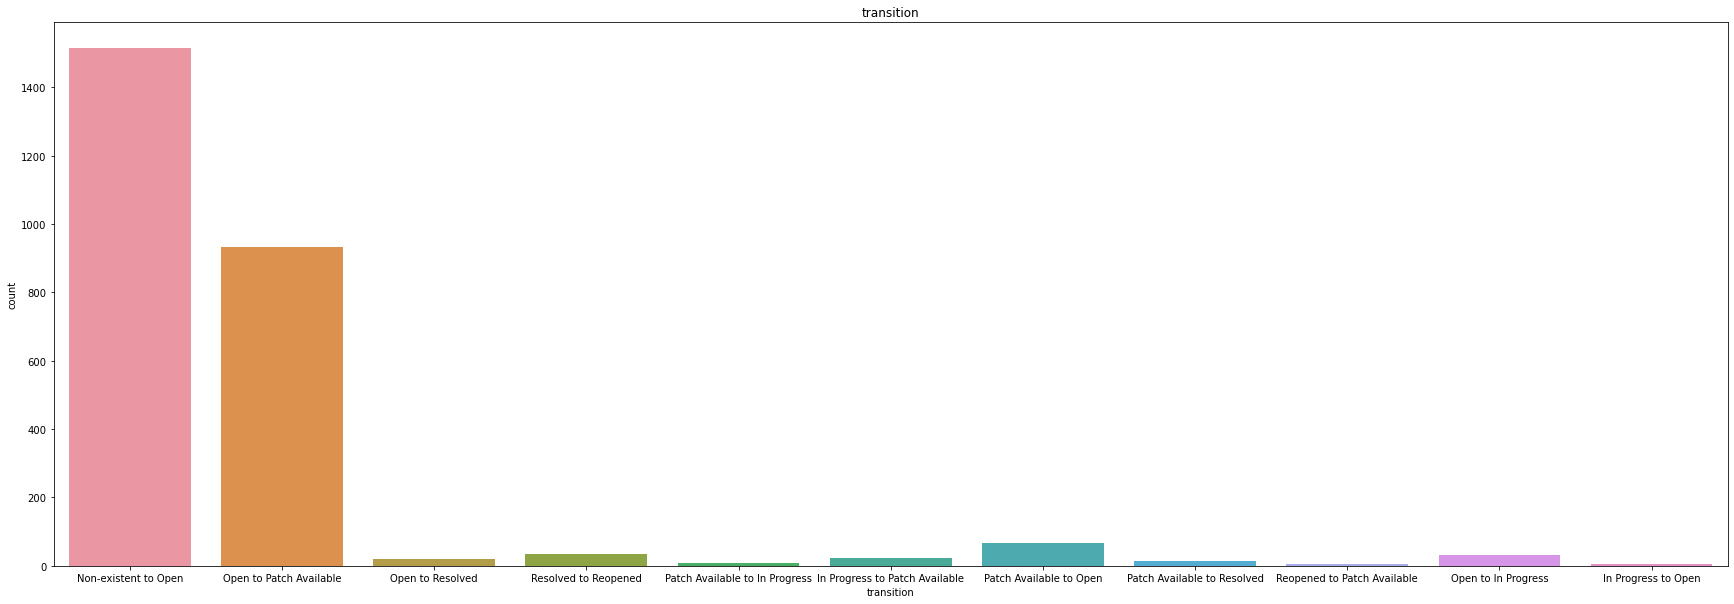

In [894]:
col = 'transition'
fig, ax = plt.subplots(figsize=(30,10))
x = sns.countplot(x=col,  data=custom_df).set_title(col)

#in the plot is not listed how many transitions there were from inexistent to open


In [895]:
print('from_status',custom_df['from_status'].value_counts())
print('------------------')
print('to_status', custom_df['to_status'].value_counts())
#there is too much unbalance between the categorical values. I will convert all the column whose count is less than 200 to RARE

from_status Inexistent         1515
Open                987
Patch Available      90
Resolved             35
In Progress          28
Reopened              6
Name: from_status, dtype: int64
------------------
to_status Open               1585
Patch Available     964
In Progress          42
Resolved             35
Reopened             35
Name: to_status, dtype: int64


In [896]:
#feature to capture how many issues the assigned user solved so far 
problem_solvers = custom_df[custom_df['to_status'] == 'Resolved']['assignee'].value_counts().reset_index()
problem_solvers= problem_solvers.rename(columns={"index": 'assignee', 'assignee': "issue_solved_by_assignee"})
custom_df = pd.merge(custom_df, problem_solvers,  on=['assignee'])


In [897]:
to_modify = ['Patch Available', 'Resolved','In Progress','Reopened']
custom_df.loc[custom_df['from_status'].isin(to_modify),['from_status'] ] = 'RARE'


In [900]:
to_modify = ['Resolved','In Progress','Reopened']
custom_df.loc[custom_df['to_status'].isin(to_modify),['to_status'] ] = 'RARE'
df_day_count.loc[df_day_count['status'].isin(to_modify),['status'] ] = 'RARE'

In [901]:
df_day_count['status'].value_counts()

RARE               9906
Patch Available    3302
Closed             3302
Open               3302
Name: status, dtype: int64

In [902]:
def get_calender_day(x):
    o = datetime.datetime.strptime(x,"%Y-%m-%dT%H:%M:%S.%f%z")
    
    return str(o.day) + "-" + str(o.month) + "-" + str(o.year)
    
#I convert both the Iso date into string of the following format (dd-mm-yyyy) in order to 
custom_df['calendar_day'] = custom_df['when'].apply(
        lambda x: get_calender_day(x) )  

df_day_count['calendar_day'] = df_day_count['day'].apply(
        lambda x: get_calender_day(x) )  


#we merge the previous custom df made so far  and the day_count df
custom_df = pd.merge(custom_df, df_day_count,  how='left', left_on=['calendar_day','to_status'], right_on = ['calendar_day','status'],suffixes=('', '_drop'))
#we drop every duplicate from the merge process
custom_df.drop([col for col in custom_df.columns if 'drop' in col], axis=1, inplace=True)
#we if there are to_status columns which are empty
assert(custom_df['to_status'].isna().sum() == 0)

In [752]:
#create feature for day,month,year
# for index, row in custom_df.iterrows():
#     #we create new feature
#     o = datetime.datetime.strptime(row['when'],"%Y-%m-%dT%H:%M:%S.%f%z")
#     #we keep count of the # of transictions so far
#     custom_df.loc[index,'day'] = o.day
#     custom_df.loc[index,'month'] = o.month
#     custom_df.loc[index,'year'] = o.year

In [903]:
# number of issue of the same per month and year
custom_df['count_month_of_year'] = custom_df.groupby(['year','month'])['count'].transform('sum')
custom_df['count_year'] =  custom_df.groupby(['year'])['count'].transform('sum')

In [904]:
custom_df.isna().sum()


status                      0
priority                    0
updated                     0
issue_type                  0
reporter                    0
created                     0
resolutiondate              0
vote_count                  0
project                     0
assignee                    0
comment_count               0
key                         0
description_length          0
summary_length              0
watch_count                 0
resolution                  0
days_in_current_status      0
from_status                 0
when                        0
days_in_from_status         0
who                         0
to_status                   0
days_since_open             0
transition                  0
weekday                     0
week_of_year                0
day                         0
month                       0
year                        0
sec_to_sol                  0
sec_passed_so_far           0
logsec_to_sol               0
transictions_so_far         0
issue_solv

In [905]:
#we remove 'year', 'day_in_from_status', 'from_status'

#we create new freature for defining how many people working on a specific issue 
group_assignee = custom_df.groupby(['key'])['assignee'].unique().reset_index()
group_reporter = custom_df.groupby(['key'])['reporter'].unique().reset_index()
group_who = custom_df.groupby(['key'])['who'].unique().reset_index()


merge_groups = pd.merge(group_assignee, group_reporter,  on='key')
merge_groups = pd.merge(merge_groups, group_who,  on='key')

for index, row in merge_groups.iterrows():
    teamList = list(row['assignee'])
    
    for el in row['reporter']:
        if(el not in teamList):
            teamList.append(el)
            
    for el in row['who']:
        if(el not in teamList):
            teamList.append(el)
            
    merge_groups.loc[index,'team_count'] = len(teamList)
    

merge_groups['team_count'].describe()

count    552.000000
mean       1.472826
std        0.574081
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: team_count, dtype: float64

In [906]:
custom_df = pd.merge(custom_df, merge_groups,  on='key' ,suffixes=('', '_drop'))
custom_df.drop([col for col in custom_df.columns if 'drop' in col], axis=1, inplace=True)
custom_df

,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,project,assignee,...,sec_to_sol,sec_passed_so_far,logsec_to_sol,transictions_so_far,issue_solved_by_assignee,calendar_day,count,count_month_of_year,count_year,team_count
0,Resolved,Major,2018-02-22T00:52:52.033+0000,Improvement,elmendavies,2018-02-12T16:12:41.548+0000,2018-02-22T00:52:52.017+0000,0,AVRO,cutting,...,8.088105e+05,0.000,13.603320,0.0,6,12-2-2018,529,1011,1644,2.0
1,Resolved,Major,2018-02-22T00:52:52.033+0000,Improvement,elmendavies,2018-02-12T16:12:41.548+0000,2018-02-22T00:52:52.017+0000,0,AVRO,cutting,...,7.103487e+05,98461.746,13.473511,1.0,6,13-2-2018,104,1011,1644,2.0
2,Resolved,Major,2018-02-23T00:10:37.233+0000,Improvement,kdrakon,2018-01-18T02:49:13.924+0000,2018-02-22T19:26:30.813+0000,0,AVRO,cutting,...,3.083837e+06,0.000,14.941685,0.0,6,18-1-2018,523,523,1644,2.0
3,Resolved,Major,2018-02-27T22:06:15.650+0000,Bug,radai,2017-05-17T01:27:34.188+0000,2018-02-27T22:06:15.627+0000,0,AVRO,cutting,...,2.478472e+07,0.000,17.025738,0.0,6,17-5-2017,484,484,4030,2.0
4,Resolved,Major,2018-02-27T22:06:15.650+0000,Bug,radai,2017-05-17T01:27:34.188+0000,2018-02-27T22:06:15.627+0000,0,AVRO,cutting,...,2.161830e+07,3166420.554,16.889051,1.0,6,22-6-2017,101,807,4030,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,Closed,Major,2010-09-08T21:07:43.829+0000,Bug,neopallium,2010-04-03T13:45:43.028+0000,2010-08-25T19:24:00.389+0000,0,AVRO,neopallium,...,1.236892e+07,92979.944,16.330697,1.0,1,4-4-2010,0,1097,18730,3.0
1123,Closed,Major,2010-09-08T21:07:43.829+0000,Bug,neopallium,2010-04-03T13:45:43.028+0000,2010-08-25T19:24:00.389+0000,0,AVRO,neopallium,...,1.236892e+07,92979.944,16.330697,1.0,1,4-4-2010,2,1097,18730,3.0
1124,Closed,Major,2010-09-08T21:07:43.829+0000,Bug,neopallium,2010-04-03T13:45:43.028+0000,2010-08-25T19:24:00.389+0000,0,AVRO,neopallium,...,1.236803e+07,93869.582,16.330625,2.0,1,4-4-2010,7,1097,18730,3.0
1125,Closed,Major,2010-09-08T21:07:43.829+0000,Bug,neopallium,2010-04-03T13:45:43.028+0000,2010-08-25T19:24:00.389+0000,0,AVRO,neopallium,...,1.236803e+07,93869.582,16.330625,2.0,1,4-4-2010,0,1097,18730,3.0


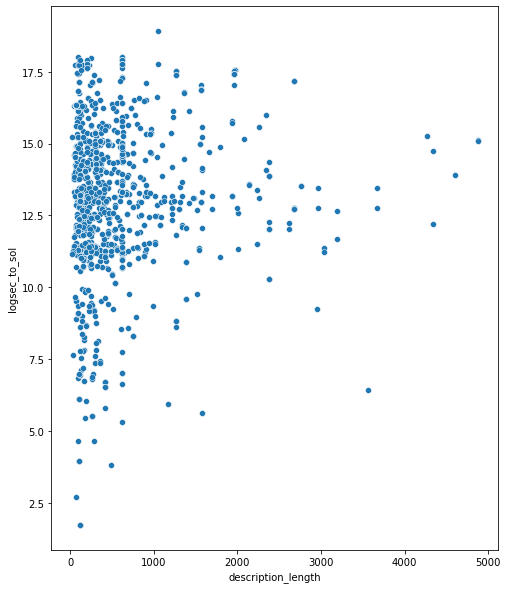

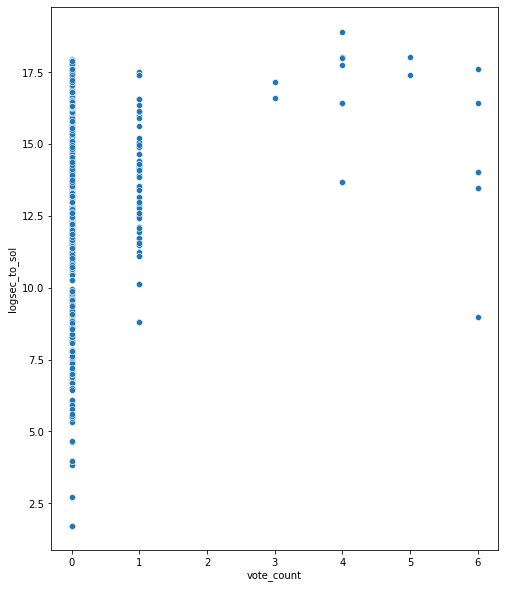

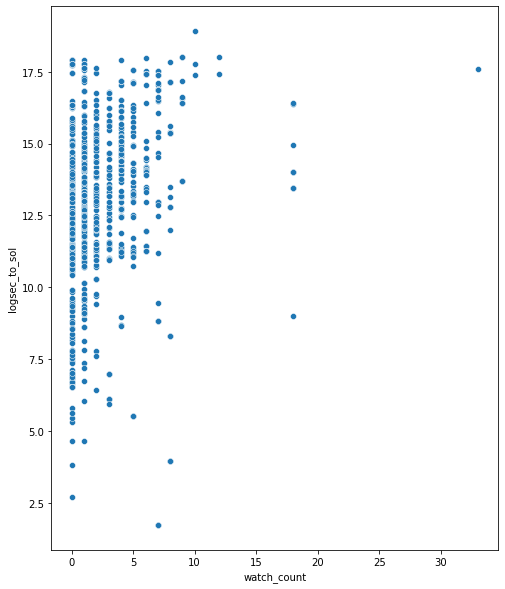

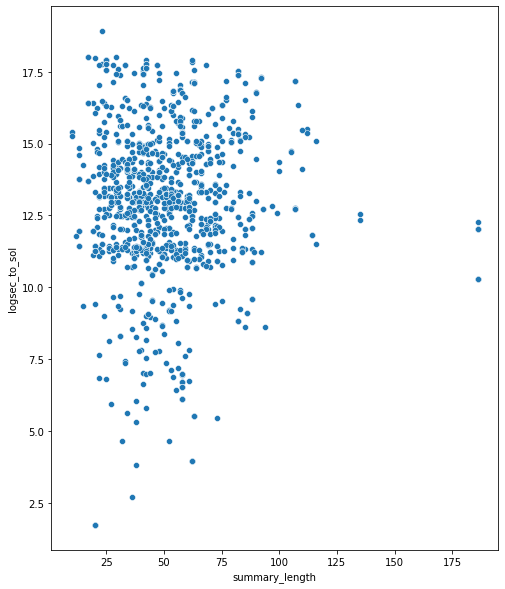

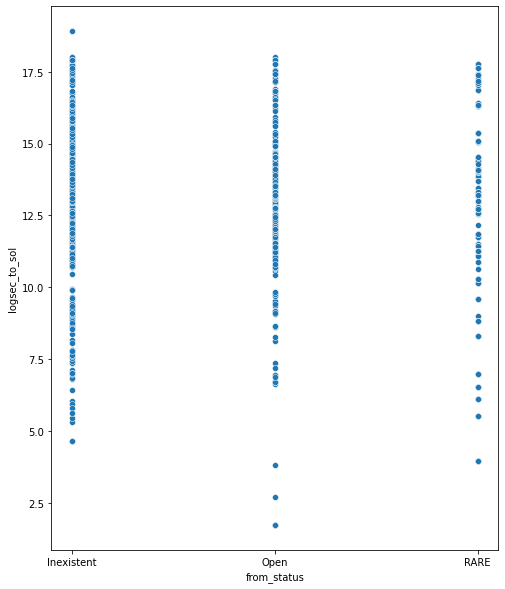

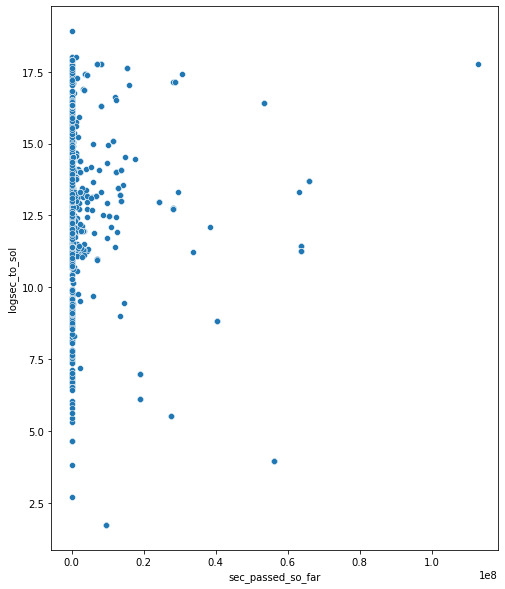

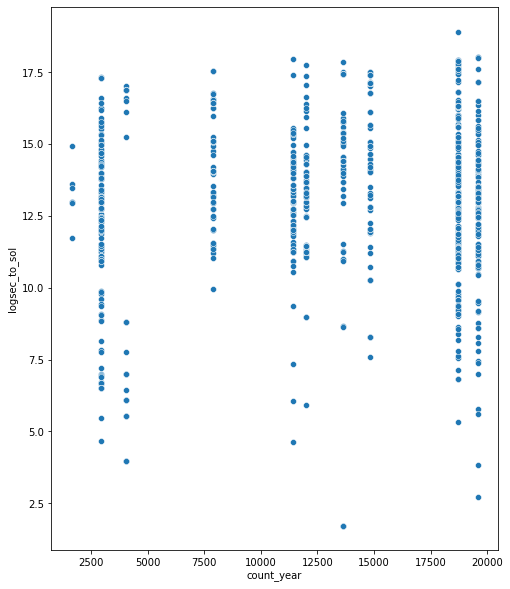

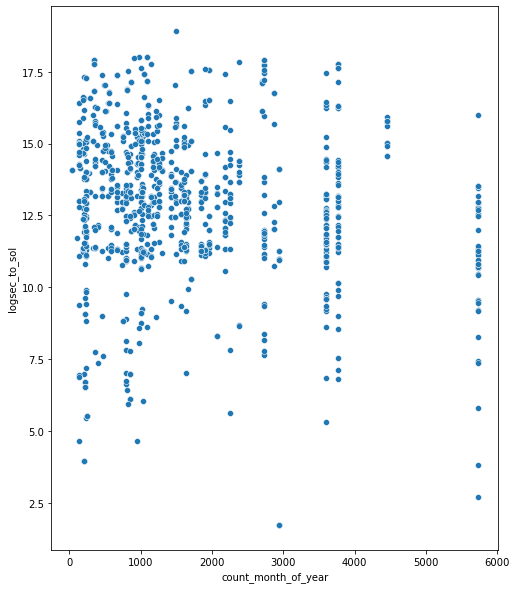

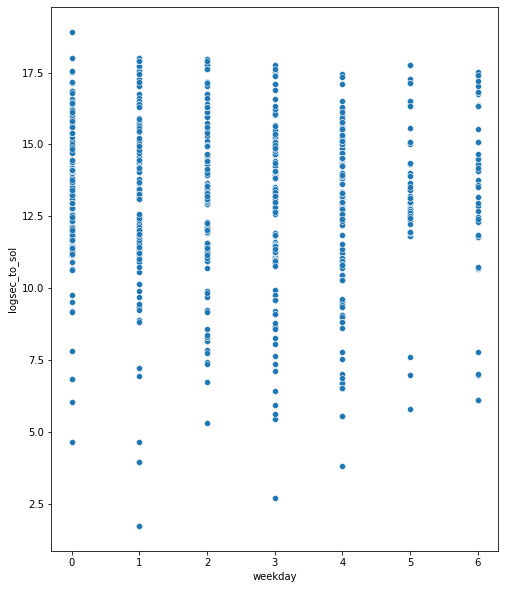

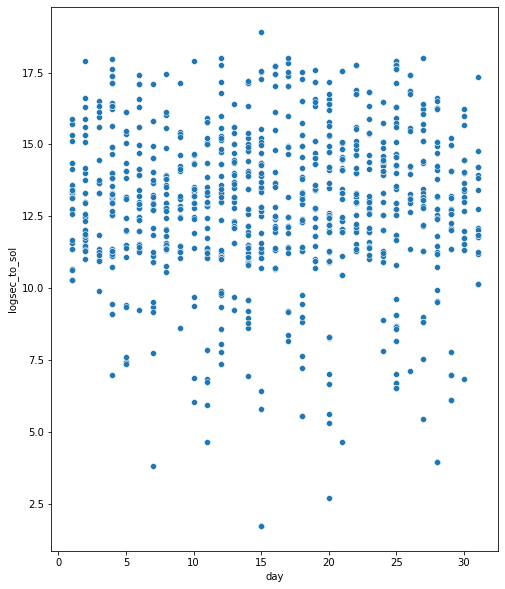

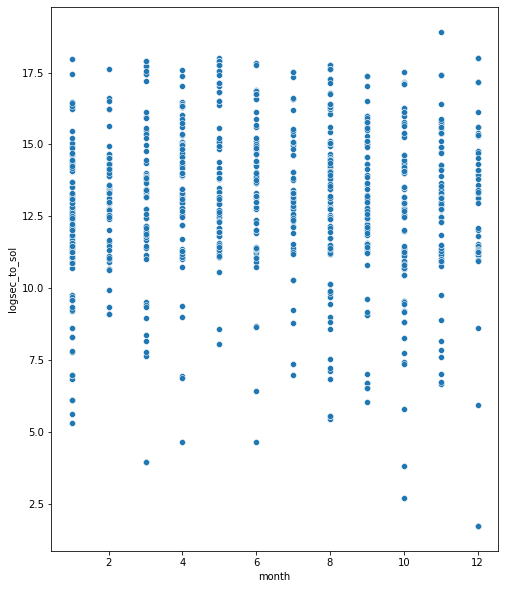

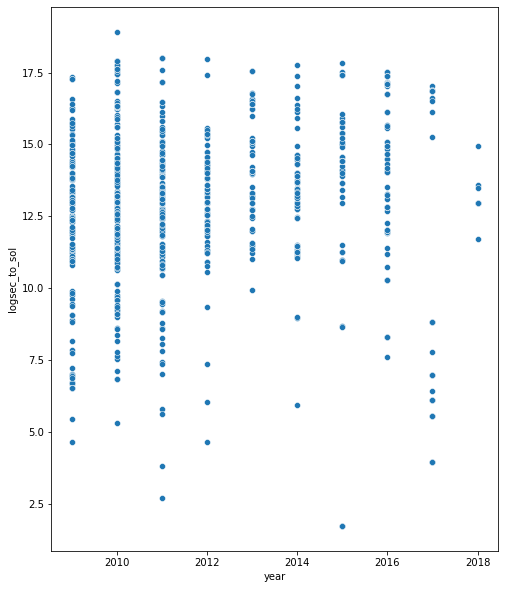

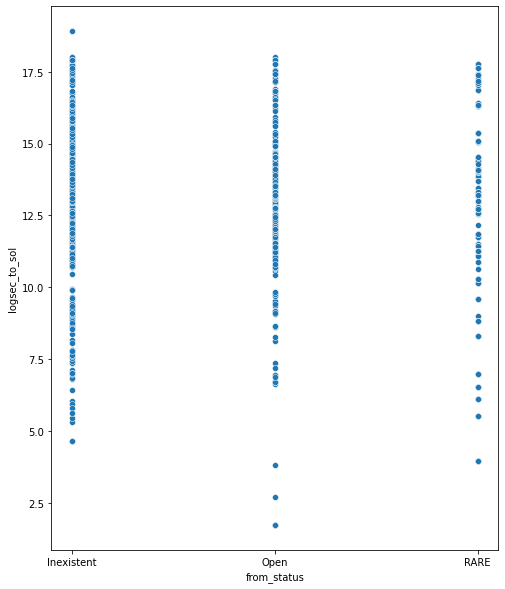

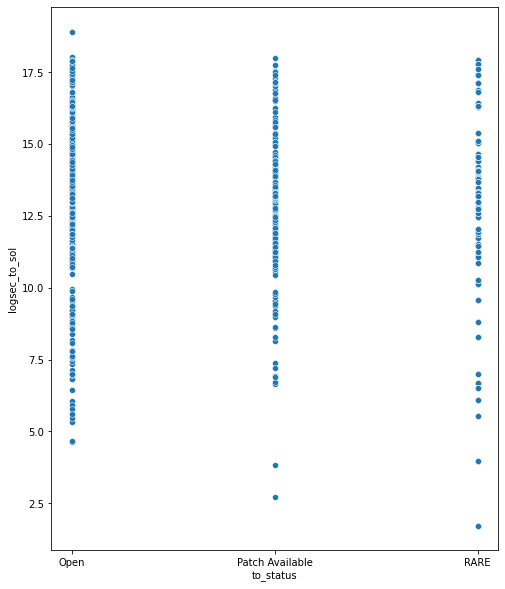

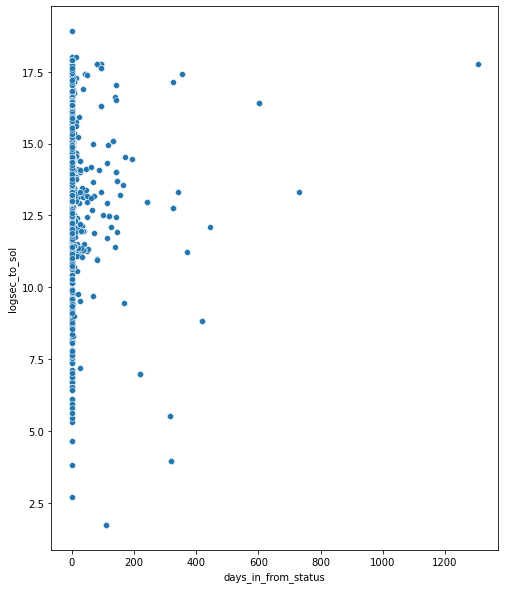

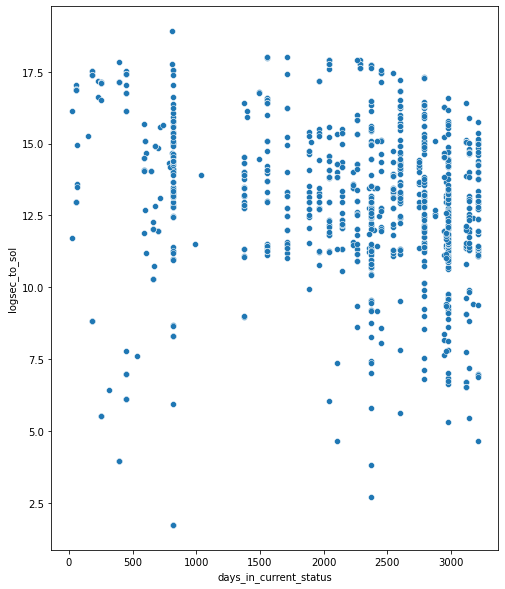

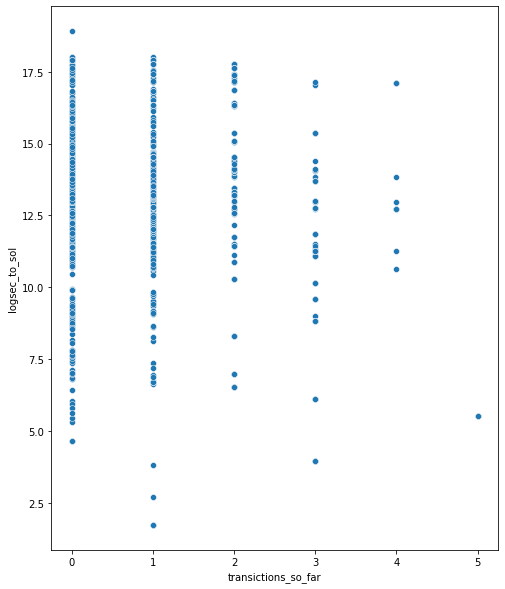

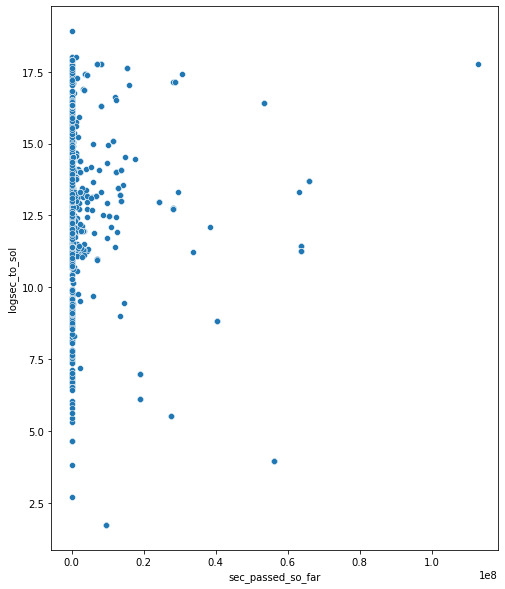

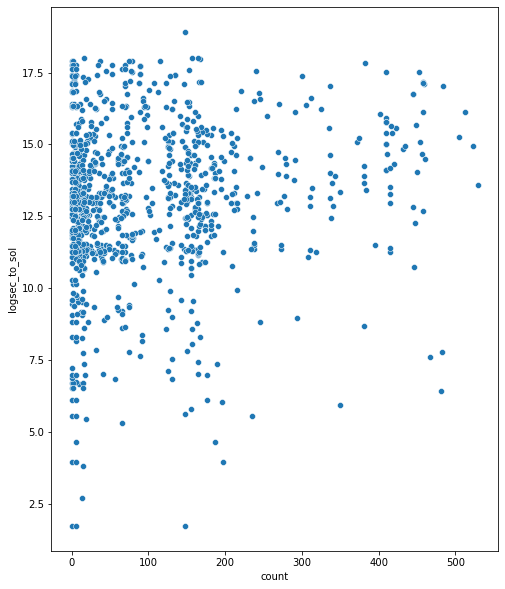

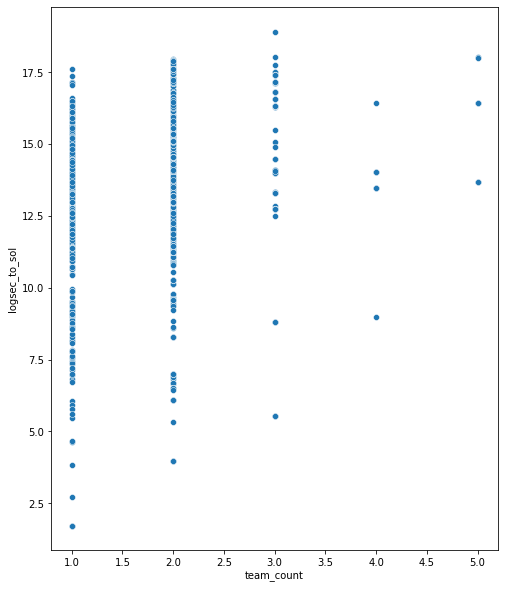

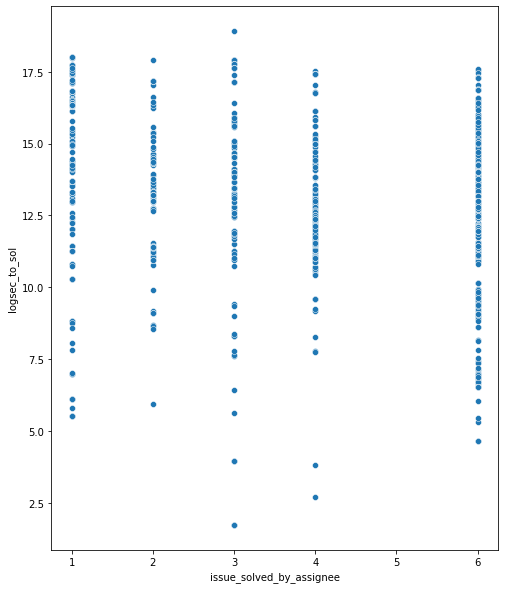

In [907]:
#print outliers for pp plot
var = ["description_length","vote_count","watch_count","summary_length","from_status", "sec_passed_so_far","count_year",\
      'count_month_of_year','weekday','day','month','year','from_status','to_status','days_in_from_status','days_in_current_status',\
       'transictions_so_far','sec_passed_so_far','count',\
       'team_count', 'issue_solved_by_assignee'   
      ]
for v in var:
    
    sns.scatterplot(data=custom_df, x=v, y="logsec_to_sol")
    plt.show()
#description_length,watch_count and summary_length show outliers we may delete from the df

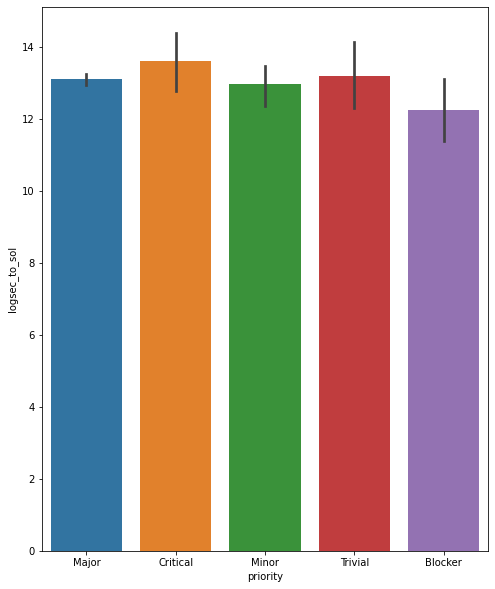

In [908]:
#even if there could preferences to label encode, the time spent for solving the different priorities does not change
ax = sns.barplot(x="priority", y="logsec_to_sol", data=custom_df)


In [909]:
#label encoding of categorical features
custom_df.info()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['priority','from_status','to_status','issue_type','status','who','assignee','resolution']
for col in cols:
    custom_df[col] = le.fit_transform(custom_df[col])



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1126
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   status                    1127 non-null   object 
 1   priority                  1127 non-null   object 
 2   updated                   1127 non-null   object 
 3   issue_type                1127 non-null   object 
 4   reporter                  1127 non-null   object 
 5   created                   1127 non-null   object 
 6   resolutiondate            1127 non-null   object 
 7   vote_count                1127 non-null   int64  
 8   project                   1127 non-null   object 
 9   assignee                  1127 non-null   object 
 10  comment_count             1127 non-null   int64  
 11  key                       1127 non-null   object 
 12  description_length        1127 non-null   float64
 13  summary_length            1127 non-null   int64  
 14  watch_co

In [836]:
#feature selection 

X_train=custom_df.drop(['year','logsec_to_sol','key','project','sec_to_sol','status','when',\
                       'updated','calendar_day','transition','who','created','reporter','updated',\
                       'resolutiondate'],axis=1)
y_train=custom_df[['logsec_to_sol']]
col_names = X_train.columns

In [798]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train, y_train)

X_train_st= scaler.transform(X_train)



reg = LassoCV()
reg.fit(X_train_st, y_train)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train_st, y_train))
coef = pd.Series(reg.coef_, index = col_names)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Best alpha using built-in LassoCV: 0.394301
Best score using built-in LassoCV: 0.044426
Lasso picked 3 variables and eliminated the other 22 variables


C:\Users\gabri\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0614308954482112, tolerance: 0.6745383367269313
  tol, rng, random, positive)
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.37537405533385, tolerance: 0.6745383367269313
  tol, rng, random, positive)
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the

In [773]:
custom_df.describe()

,status,priority,issue_type,vote_count,assignee,comment_count,description_length,summary_length,watch_count,resolution,...,year,sec_to_sol,sec_passed_so_far,logsec_to_sol,transictions_so_far,issue_solved_by_assignee,count,count_month_of_year,count_year,team_count
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,...,1127.000000,1.127000e+03,1.127000e+03,1127.000000,1127.00000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,0.101154,1.973381,0.887311,0.167702,6.340728,8.303461,550.161712,50.623780,2.214729,1.050577,...,2011.535049,4.592255e+06,2.700067e+06,13.046472,0.73913,4.277728,94.639752,1741.629104,13297.755102,1.629104
std,0.301666,0.657787,1.066480,0.729549,5.521728,9.956933,663.114923,22.576817,2.936576,0.440125,...,2.320341,1.186104e+07,9.483157e+06,2.596470,0.91237,1.891382,113.450452,1466.621864,6273.341270,0.698238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,10.000000,0.000000,0.000000,...,2009.000000,5.558000e+00,0.000000e+00,1.715238,0.00000,1.000000,0.000000,33.000000,1644.000000,1.000000
25%,0.000000,2.000000,0.000000,0.000000,2.000000,3.000000,156.000000,36.000000,0.000000,1.000000,...,2010.000000,9.956681e+04,0.000000e+00,11.508584,0.00000,3.000000,9.000000,742.000000,7905.000000,1.000000
50%,0.000000,2.000000,1.000000,0.000000,2.000000,5.000000,301.000000,47.000000,1.000000,1.000000,...,2011.000000,5.157896e+05,1.038010e+02,13.153454,1.00000,4.000000,50.000000,1189.000000,14826.000000,2.000000
75%,0.000000,2.000000,1.000000,0.000000,13.000000,10.000000,622.383799,61.000000,4.000000,1.000000,...,2013.000000,2.256884e+06,3.544776e+05,14.629494,1.00000,6.000000,152.500000,2706.000000,18730.000000,2.000000
max,1.000000,4.000000,6.000000,6.000000,15.000000,77.000000,4873.000000,186.000000,33.000000,4.000000,...,2018.000000,1.646902e+08,1.127743e+08,18.919577,5.00000,6.000000,529.000000,5723.000000,19578.000000,5.000000


In [799]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_train_st, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1
    
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')
    
    

Fold:1, Train set: 901, Test set:226
Fold:2, Train set: 901, Test set:226
Fold:3, Train set: 902, Test set:225
Fold:4, Train set: 902, Test set:225
Fold:5, Train set: 902, Test set:225


In [801]:
score = cross_val_score(LinearRegression(), X_train_st, y_train, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-5.87505323 -4.85902206 -4.98571601 -6.91947073 -5.92066609]
rmse= 2.39


In [767]:
custom_df.corr()

,status,priority,issue_type,vote_count,assignee,comment_count,description_length,summary_length,watch_count,resolution,...,year,sec_to_sol,sec_passed_so_far,logsec_to_sol,transictions_so_far,issue_solved_by_assignee,count,count_month_of_year,count_year,team_count
status,1.000000,0.027008,-0.113603,0.027771,0.127510,0.063985,0.186467,0.204059,0.325340,-0.025189,...,0.653423,0.234286,0.201030,0.091135,0.215350,-0.260969,0.296890,-0.099105,-0.121571,0.195140
priority,0.027008,1.000000,0.062817,0.085187,-0.075745,-0.042970,-0.110080,-0.010482,-0.037957,-0.007616,...,-0.038373,0.014286,0.013364,0.039372,0.028374,0.035929,-0.019289,0.012881,-0.048482,0.079033
issue_type,-0.113603,0.062817,1.000000,0.136172,-0.002523,0.186131,-0.128555,-0.257816,0.097910,0.106756,...,-0.062823,0.125376,0.117792,0.117823,-0.023850,-0.070325,0.004039,0.077199,0.076814,-0.047829
vote_count,0.027771,0.085187,0.136172,1.000000,0.047312,0.664435,-0.026847,-0.156684,0.595866,-0.026439,...,0.115879,0.217611,0.300521,0.140963,0.112483,-0.145130,-0.030065,-0.068806,-0.001803,0.429056
assignee,0.127510,-0.075745,-0.002523,0.047312,1.000000,0.067076,0.095161,0.109257,0.178143,0.052834,...,0.298929,-0.033921,0.060034,-0.021316,0.090112,-0.506109,0.169418,0.173676,0.159362,-0.034454
comment_count,0.063985,-0.042970,0.186131,0.664435,0.067076,1.000000,0.057362,-0.148832,0.692867,-0.021542,...,0.247439,0.119753,0.362235,0.162712,0.221156,-0.138456,0.007062,-0.131239,-0.057681,0.441328
description_length,0.186467,-0.110080,-0.128555,-0.026847,0.095161,0.057362,1.000000,0.311557,0.049425,0.205340,...,0.161813,0.049221,0.031018,0.076083,0.091016,-0.016983,0.069067,0.007093,0.078072,0.260042
summary_length,0.204059,-0.010482,-0.257816,-0.156684,0.109257,-0.148832,0.311557,1.000000,-0.068156,0.104163,...,0.119042,-0.049285,-0.062027,-0.001732,0.070424,-0.070177,0.038544,-0.006095,0.000113,0.120040
watch_count,0.325340,-0.037957,0.097910,0.595866,0.178143,0.692867,0.049425,-0.068156,1.000000,-0.004287,...,0.601444,0.236750,0.349299,0.209040,0.218153,-0.220052,0.207244,-0.147818,-0.115331,0.377583
resolution,-0.025189,-0.007616,0.106756,-0.026439,0.052834,-0.021542,0.205340,0.104163,-0.004287,1.000000,...,-0.004781,0.119377,0.071168,0.070438,0.066061,-0.111839,0.005399,0.018541,0.058334,0.139123


<AxesSubplot:>

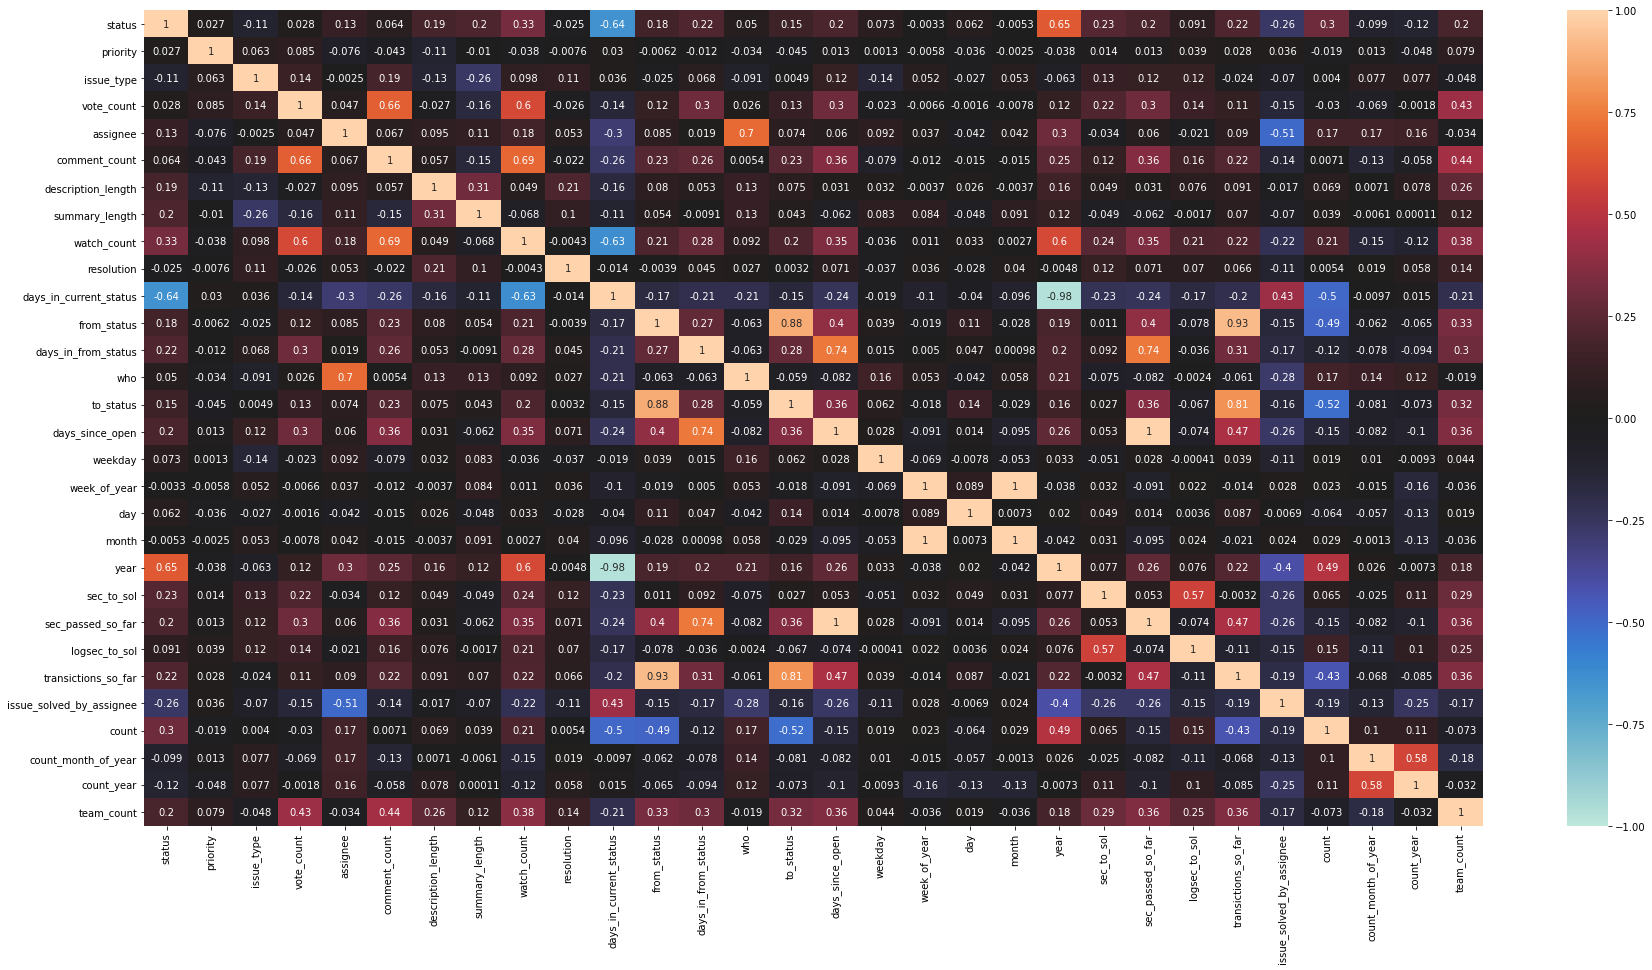

In [768]:
#correlation 
corrmat = custom_df.corr()
f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(custom_df.corr(), annot = True, vmin=-1, vmax=1, center= 0)

#not so much correlation. Maybe only just watch count and comment count

In [582]:
#I would like to do the same thing for the project. But in this case we only have one element
custom_df["project"].value_counts()

AVRO    1127
Name: project, dtype: int64

In [583]:
custom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1126
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   status                    1127 non-null   int32  
 1   priority                  1127 non-null   int32  
 2   updated                   1127 non-null   object 
 3   issue_type                1127 non-null   int32  
 4   reporter                  1127 non-null   object 
 5   created                   1127 non-null   object 
 6   resolutiondate            1127 non-null   object 
 7   vote_count                1127 non-null   int64  
 8   project                   1127 non-null   object 
 9   assignee                  1127 non-null   int32  
 10  comment_count             1127 non-null   int64  
 11  key                       1127 non-null   object 
 12  description_length        1127 non-null   float64
 13  summary_length            1127 non-null   int64  
 14  watch_co

In [826]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

#feature selection with lasso regressor
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format( \
    np.sum(feature_sel_model.estimator_.coef_ == 0)))


total features: 25
selected features: 23
features with coefficients shrank to zero: 1


In [585]:
selected_feat

Index(['priority', 'issue_type', 'vote_count', 'assignee', 'comment_count',
       'description_length', 'summary_length', 'watch_count',
       'days_in_current_status', 'from_status', 'days_in_from_status',
       'to_status', 'days_since_open', 'weekday', 'day', 'month',
       'transictions_so_far', 'issue_solved_by_assignee', 'count',
       'count_month_of_year', 'count_year', 'team_count'],
      dtype='object')

In [823]:
custom_df.columns

Index(['status', 'priority', 'updated', 'issue_type', 'reporter', 'created',
       'resolutiondate', 'vote_count', 'project', 'assignee', 'comment_count',
       'key', 'description_length', 'summary_length', 'watch_count',
       'resolution', 'days_in_current_status', 'from_status', 'when',
       'days_in_from_status', 'who', 'to_status', 'days_since_open',
       'transition', 'weekday', 'week_of_year', 'day', 'month', 'year',
       'sec_to_sol', 'sec_passed_so_far', 'logsec_to_sol',
       'transictions_so_far', 'issue_solved_by_assignee', 'calendar_day',
       'count', 'count_month_of_year', 'count_year', 'team_count'],
      dtype='object')

In [784]:
X_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

C:\Users\gabri\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


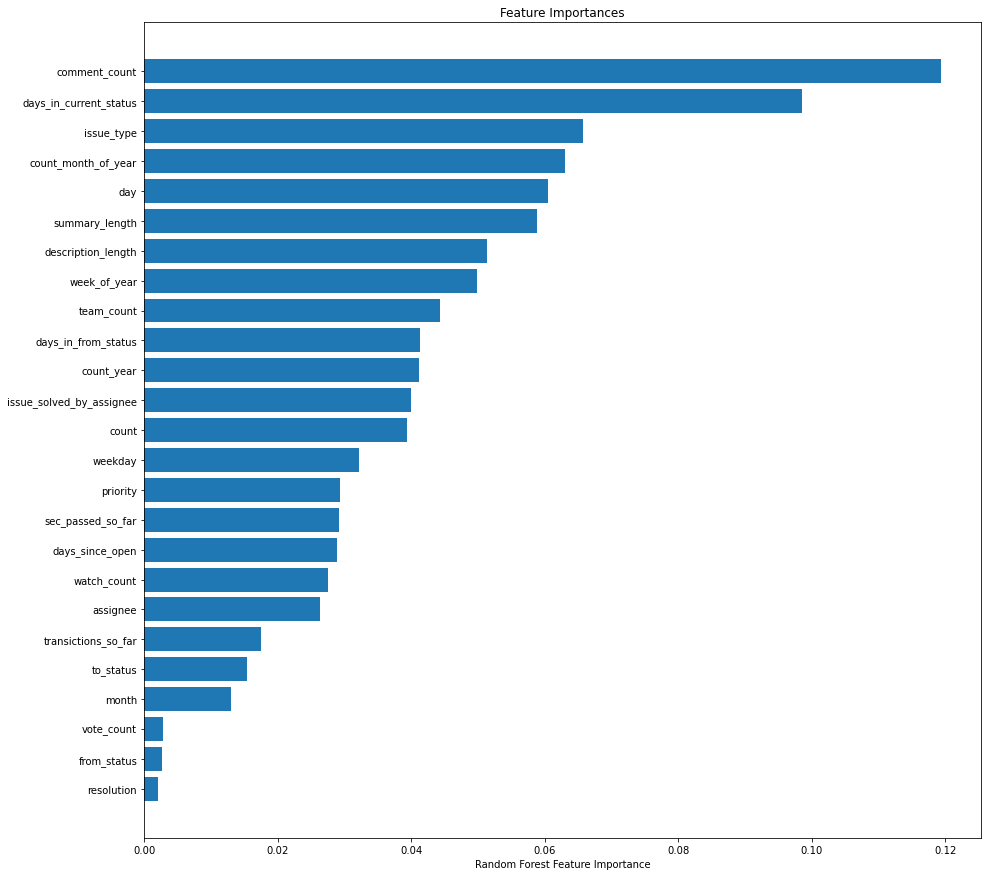

In [802]:
from sklearn.ensemble import RandomForestRegressor
#feature importance with random forest regressor

model = RandomForestRegressor()
# fit the model
model.fit(X_train_st, y_train)

importances = model.feature_importances_
idxs = np.argsort(importances)
plt.figure(figsize = (15,15))
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')
plt.show()

In [588]:
#variance thresholding
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)  # fit finds the features with zero variance



VarianceThreshold(threshold=0)

C:\Users\gabri\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[21:28:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


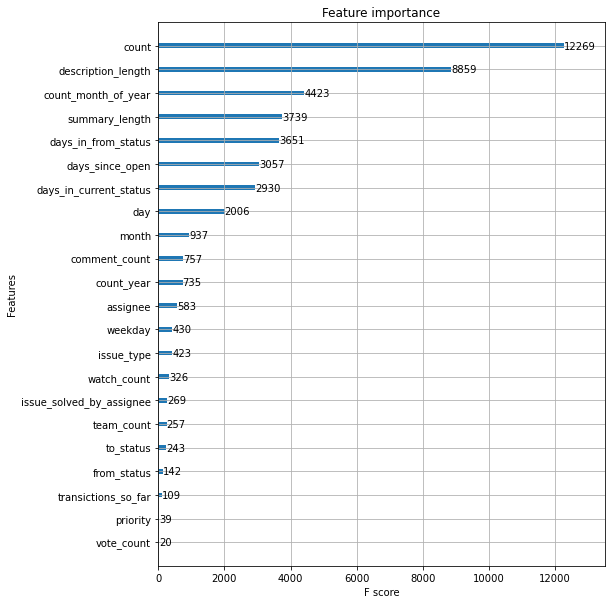

In [589]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# plot feature importance
plot_importance(model)
pyplot.show()

In [590]:
for i,c in enumerate(col_names):
    print(i,c)

0 priority
1 issue_type
2 vote_count
3 assignee
4 comment_count
5 description_length
6 summary_length
7 watch_count
8 days_in_current_status
9 from_status
10 days_in_from_status
11 to_status
12 days_since_open
13 weekday
14 day
15 month
16 sec_passed_so_far
17 transictions_so_far
18 issue_solved_by_assignee
19 count
20 count_month_of_year
21 count_year
22 team_count


In [622]:
columns_to_keep = ['priority', 'issue_type', 'vote_count', 'assignee', 'comment_count',
       'description_length', 'summary_length', 'watch_count',
       'days_in_current_status', 'from_status', 'days_in_from_status',
       'to_status', 'days_since_open', 'weekday', 'day', 'month',
       'transictions_so_far', 'issue_solved_by_assignee', 'count',
       'count_month_of_year', 'count_year', 'team_count']

Text(0.5, 1.0, 'Feature importance using Lasso Model')

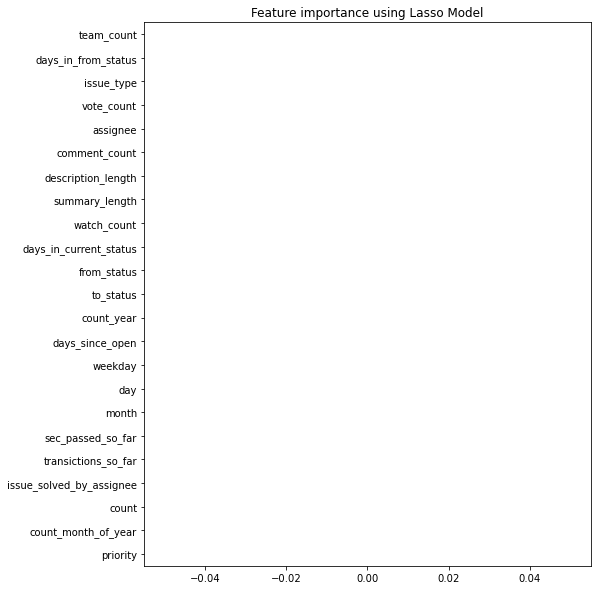

In [623]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [837]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score,mean_squared_error,mean_absolute_error,mean_squared_log_error
from sklearn_pandas import DataFrameMapper

num = [([n], [StandardScaler()]) for n in col_names]
mapper = DataFrameMapper(num, df_out=True)


def evaluation(pipeline, X, y):
    y_predict = pipeline.predict(X)
    return{
        'mse': mean_squared_error(y, y_predict),
        'rmse': np.sqrt(mean_squared_error(y, y_predict)),
        ' mean_squared_log_error': mean_squared_log_error(y, y_predict)

    }

def run_model(columns_to_keep,X_train,y_train):

#     train_df, test_df = train_test_split(custom_df, test_size=0.1, shuffle=False)
#     X_train, y_train = custom_df[columns_to_keep], custom_df['logsec_to_sol']
#     X_test, y_test = custom_df[columns_to_keep], custom_df['logsec_to_sol']
    
    

    clf = LinearRegression()
    pipeline = Pipeline([
        ('preprocess', mapper),
        ('clf', clf)
    ], verbose=True)

    
    pipeline.fit(X_train, y_train)
    scores = cross_val_score(pipeline, X=X_train, y=y_train, cv=10, n_jobs=1,scoring='neg_root_mean_squared_error')
    return abs(np.mean(scores))
#     return evaluation(pipeline, X_test[columns_to_keep], y_test)

run_model(col_names,X_train,y_train)

[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.0s
[Pipel

2.5555704660566407

In [852]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1126
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   priority                  1127 non-null   int32  
 1   issue_type                1127 non-null   int32  
 2   vote_count                1127 non-null   int64  
 3   assignee                  1127 non-null   int32  
 4   comment_count             1127 non-null   int64  
 5   description_length        1127 non-null   float64
 6   summary_length            1127 non-null   int64  
 7   watch_count               1127 non-null   int64  
 8   resolution                1127 non-null   int32  
 9   days_in_current_status    1127 non-null   float64
 10  from_status               1127 non-null   int32  
 11  days_in_from_status       1127 non-null   float64
 12  to_status                 1127 non-null   int32  
 13  days_since_open           1127 non-null   float64
 14  weekday 

In [848]:

import statsmodels.api as sm



def check_multi_collinearity(columns_to_keep,X_train):
#     preprocessed_X_train = mapper.transform(X_train)
#     preprocessed_X_train = sm.add_constant(preprocessed_X_train)
    results = sm.OLS(y_train, X_train[columns_to_keep]).fit()
    return results.summary()
check_multi_collinearity(col_names,X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          logsec_to_sol   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              1397.
Date:                Sat, 11 Sep 2021   Prob (F-statistic):                        0.00
Time:                        00:24:02   Log-Likelihood:                         -2573.7
No. Observations:                1127   AIC:                                      5195.
Df Residuals:                    1103   BIC:                                      5316.
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
priority                     0.3350      0.113      2.960      0.003       0.113       0.557
issue_type                   0.3476      0.074      4.701      0.000       0.203       0.493
vote_count                  -0.4316      0.152     -2.846      0.005      -0.729      -0.134
assignee                    -0.0122      0.015     -0.791      0.429      -0.043       0.018
comment_count                0.0069      0.012      0.574      0.566      -0.017       0.030
description_length        7.542e-05      0.000      0.609      0.543      -0.000       0.000
summary_length               0.0008      0.004      0.217      0.828      -0.006       0.008
watch_count                  0.2660      0.049      5.475      0.000       0.171       0.361
resolution                   0.3531      0.174      2.035      0.042       0.013       0.694
days_in_current_status       0.0002      0.000      1.266      0.206      -0.000       0.000
from_status                  1.2715      0.343      3.712      0.000       0.599       1.944
days_in_from_status         -0.0011      0.001     -0.726      0.468      -0.004       0.002
to_status                   -0.1683      0.208     -0.810      0.418      -0.576       0.239
days_since_open          -1.626e-09   1.29e-10    -12.566      0.000   -1.88e-09   -1.37e-09
weekday                     -0.3079      0.055     -5.641      0.000      -0.415      -0.201
week_of_year                -2.6535      0.206    -12.891      0.000      -3.057      -2.250
day                          0.3952      0.029     13.775      0.000       0.339       0.452
month                       11.6177      0.892     13.019      0.000       9.867      13.369
sec_passed_so_far        -3.523e-08   1.29e-08     -2.731      0.006   -6.06e-08   -9.92e-09
transictions_so_far         -1.2703      0.228     -5.560      0.000      -1.719      -0.822
issue_solved_by_assignee    -0.1245      0.051     -2.427      0.015      -0.225      -0.024
count                        0.0021      0.001      2.009      0.045    4.83e-05       0.004
count_month_of_year         -0.0003   6.25e-05     -4.675      0.000      -0.000      -0.000
count_year               -3.042e-05   1.97e-05     -1.544      0.123   -6.91e-05    8.25e-06
team_count                   0.9609      0.138      6.944      0.000       0.689       1.232
==============================================================================
Omnibus:                      164.688   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.604
Skew:                          -0.887   Prob(JB):                     7.98e-69
Kurtosis:                       4.879   Cond. No.               

In [849]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# preprocessed_X_train = mapper.transform(X_train)
# preprocessed_X_train = sm.add_constant(preprocessed_X_train)
preprocessed_X_train = X_train
for column in col_names:
    print(f"""{column}, {variance_inflation_factor(
                                preprocessed_X_train.values, 
                                list(preprocessed_X_train.columns).index(column))}""")
    
# variance_inflation_factor measures the ratio between the overall model variance with 
#the  single independent variable's variance. Therefore, the higher the value for a specific features, the higlhy collinear 
#the latter is with the target variable

priority, 10.842630477940212
issue_type, 2.0586049983906625
vote_count, 2.5180991771280112
assignee, 3.3154183954286665
comment_count, 4.7467921166632205
description_length, 2.2276803084174515
summary_length, 7.6577772576144465
watch_count, 6.242458337582021
resolution, 7.645048682807254
days_in_current_status, 25.669530284003034
from_status, 21.731862750651434
days_in_from_status, 2.518130243852538
to_status, 9.262779275872902


C:\Users\gabri\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


days_since_open, inf
weekday, 5.547789961759242
week_of_year, 7349.018159911513
day, 51.39439009517032
month, 8050.462601346573
sec_passed_so_far, inf
transictions_so_far, 14.072532090188721
issue_solved_by_assignee, 11.268014159619895
count, 4.496017986472948
count_month_of_year, 3.962606968644659
count_year, 16.428625099027045
team_count, 11.76696674001429


In [850]:
X_train.corr()

,priority,issue_type,vote_count,assignee,comment_count,description_length,summary_length,watch_count,resolution,days_in_current_status,...,week_of_year,day,month,sec_passed_so_far,transictions_so_far,issue_solved_by_assignee,count,count_month_of_year,count_year,team_count
priority,1.000000,0.062817,0.085187,-0.075745,-0.042970,-0.110080,-0.010482,-0.037957,-0.007616,0.030378,...,-0.005840,-0.036088,-0.002515,0.013364,0.028374,0.035929,-0.019289,0.012881,-0.048482,0.079033
issue_type,0.062817,1.000000,0.136172,-0.002523,0.186131,-0.128555,-0.257816,0.097910,0.106756,0.036422,...,0.052162,-0.026798,0.052662,0.117792,-0.023850,-0.070325,0.004039,0.077199,0.076814,-0.047829
vote_count,0.085187,0.136172,1.000000,0.047312,0.664435,-0.026847,-0.156684,0.595866,-0.026439,-0.143412,...,-0.006620,-0.001637,-0.007838,0.300521,0.112483,-0.145130,-0.030065,-0.068806,-0.001803,0.429056
assignee,-0.075745,-0.002523,0.047312,1.000000,0.067076,0.095161,0.109257,0.178143,0.052834,-0.296083,...,0.037106,-0.042101,0.042044,0.060034,0.090112,-0.506109,0.169418,0.173676,0.159362,-0.034454
comment_count,-0.042970,0.186131,0.664435,0.067076,1.000000,0.057362,-0.148832,0.692867,-0.021542,-0.259584,...,-0.011696,-0.014672,-0.014827,0.362235,0.221156,-0.138456,0.007062,-0.131239,-0.057681,0.441328
description_length,-0.110080,-0.128555,-0.026847,0.095161,0.057362,1.000000,0.311557,0.049425,0.205340,-0.158398,...,-0.003742,0.026151,-0.003672,0.031018,0.091016,-0.016983,0.069067,0.007093,0.078072,0.260042
summary_length,-0.010482,-0.257816,-0.156684,0.109257,-0.148832,0.311557,1.000000,-0.068156,0.104163,-0.112048,...,0.084350,-0.047929,0.091457,-0.062027,0.070424,-0.070177,0.038544,-0.006095,0.000113,0.120040
watch_count,-0.037957,0.097910,0.595866,0.178143,0.692867,0.049425,-0.068156,1.000000,-0.004287,-0.629213,...,0.010524,0.032729,0.002727,0.349299,0.218153,-0.220052,0.207244,-0.147818,-0.115331,0.377583
resolution,-0.007616,0.106756,-0.026439,0.052834,-0.021542,0.205340,0.104163,-0.004287,1.000000,-0.014155,...,0.036073,-0.028052,0.039773,0.071168,0.066061,-0.111839,0.005399,0.018541,0.058334,0.139123
days_in_current_status,0.030378,0.036422,-0.143412,-0.296083,-0.259584,-0.158398,-0.112048,-0.629213,-0.014155,1.000000,...,-0.100433,-0.039650,-0.095913,-0.241396,-0.204960,0.428257,-0.496483,-0.009725,0.014884,-0.205098


In [819]:
columns_to_keep = col_names.to_list()
columns_to_keep.remove('week_of_year')

In [818]:
col_names

Index(['priority', 'issue_type', 'vote_count', 'assignee', 'comment_count',
       'description_length', 'summary_length', 'watch_count', 'resolution',
       'days_in_current_status', 'from_status', 'days_in_from_status',
       'to_status', 'days_since_open', 'weekday', 'week_of_year', 'day',
       'month', 'sec_passed_so_far', 'transictions_so_far',
       'issue_solved_by_assignee', 'count', 'count_month_of_year',
       'count_year', 'team_count'],
      dtype='object')

In [627]:
columns_to_keep.remove('to_status')

In [822]:
run_model(columns_to_keep)
#the mean squared error is used because I want to penalize even the smallest error. Why this? Because the target \
#has been log-transformed and even a small value can lead ti bigger errors later when we will revert the log transform

#rmse can also be used since it highly penalize large errors

KeyError: "None of [Index(['week_of_year'], dtype='object')] are in the [columns]"

In [631]:
check_multi_collinearity(columns_to_keep)

#the R squared tells us the dependet variables logsec_to_sol is still highly explained by the train features


#remember: the p value test the null hypothesis for assessing whether a feature is correlated with the dependent variable.
# if the p value is lower than the confidence threshold (which is is usually 0.05) we cannot reject the null hypothesis which 
#means the feature is actually correlated with the target and we should remove it

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          logsec_to_sol   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              1237.
Date:                Thu, 09 Sep 2021   Prob (F-statistic):                        0.00
Time:                        22:26:27   Log-Likelihood:                         -2399.5
No. Observations:                1014   AIC:                                      4839.
Df Residuals:                     994   BIC:                                      4937.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
priority                     1.0080      0.117      8.594      0.000       0.778       1.238
issue_type                   0.4127      0.086      4.819      0.000       0.245       0.581
vote_count                  -0.4842      0.171     -2.837      0.005      -0.819      -0.149
assignee                     0.0903      0.017      5.321      0.000       0.057       0.124
comment_count                0.0171      0.013      1.307      0.192      -0.009       0.043
description_length           0.0001      0.000      0.813      0.417      -0.000       0.000
summary_length               0.0166      0.004      4.286      0.000       0.009       0.024
watch_count                  0.2634      0.045      5.791      0.000       0.174       0.353
from_status                  0.7231      0.332      2.178      0.030       0.072       1.375
days_in_from_status          0.0068      0.003      2.385      0.017       0.001       0.012
days_since_open             -0.0111      0.003     -4.327      0.000      -0.016      -0.006
weekday                      0.2352      0.047      4.972      0.000       0.142       0.328
day                          0.0583      0.009      6.383      0.000       0.040       0.076
month                        0.1450      0.023      6.346      0.000       0.100       0.190
transictions_so_far         -0.6188      0.264     -2.348      0.019      -1.136      -0.102
issue_solved_by_assignee     0.5286      0.047     11.256      0.000       0.436       0.621
count                        0.0043      0.001      4.654      0.000       0.003       0.006
count_month_of_year         -0.0004   7.07e-05     -6.096      0.000      -0.001      -0.000
count_year                   0.0002   1.59e-05     10.101      0.000       0.000       0.000
team_count                   1.1171      0.170      6.584      0.000       0.784       1.450
==============================================================================
Omnibus:                       44.788   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.935
Skew:                          -0.378   Prob(JB):                     1.77e-15
Kurtosis:                       4.018   Cond. No.                     7.27e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [592]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# initialize RFE
rfe = RFE(
 estimator=model,
 n_features_to_select=3
)
# fit RFE
rfe.fit(X_train, y_train)
# get the transformed data with
# selected columns
X_transformed = rfe.transform(X_train)

In [593]:
X_transformed

array([[0., 0., 2.],
       [1., 1., 2.],
       [0., 0., 2.],
       ...,
       [2., 2., 3.],
       [2., 2., 3.],
       [2., 2., 3.]])

In [825]:
custom_df.to_csv(r'./finaldf.csv',index=False)

In [ ]:


#to do: import the last csv containing the count of statuses for each day
#how? for each row, check its status and add new column to keep track of how statuses 
#of the same type were present on the same day 


In [ ]:
#let s give a look to the correlation between pairs of features
fts = ["description_length","summary_length","issue_type","priority", "watch_count", "comment_count", \
      "vote_count", "from_status"]
sns.pairplot(custom_df[fts], size = 2.5)
plt.show();

#I don't see any correlation

In [ ]:
#check for normality distribution
fig = plt.figure()
res = stats.probplot(custom_df['logsec_to_sol'], plot=plt)

In [824]:
custom_df

,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,project,assignee,...,sec_to_sol,sec_passed_so_far,logsec_to_sol,transictions_so_far,issue_solved_by_assignee,calendar_day,count,count_month_of_year,count_year,team_count
0,1,2,2018-02-22T00:52:52.033+0000,1,elmendavies,2018-02-12T16:12:41.548+0000,2018-02-22T00:52:52.017+0000,0,AVRO,2,...,8.088105e+05,0.000,13.603320,0.0,6,12-2-2018,529,1011,1644,2.0
1,1,2,2018-02-22T00:52:52.033+0000,1,elmendavies,2018-02-12T16:12:41.548+0000,2018-02-22T00:52:52.017+0000,0,AVRO,2,...,7.103487e+05,98461.746,13.473511,1.0,6,13-2-2018,104,1011,1644,2.0
2,1,2,2018-02-23T00:10:37.233+0000,1,kdrakon,2018-01-18T02:49:13.924+0000,2018-02-22T19:26:30.813+0000,0,AVRO,2,...,3.083837e+06,0.000,14.941685,0.0,6,18-1-2018,523,523,1644,2.0
3,1,2,2018-02-27T22:06:15.650+0000,0,radai,2017-05-17T01:27:34.188+0000,2018-02-27T22:06:15.627+0000,0,AVRO,2,...,2.478472e+07,0.000,17.025738,0.0,6,17-5-2017,484,484,4030,2.0
4,1,2,2018-02-27T22:06:15.650+0000,0,radai,2017-05-17T01:27:34.188+0000,2018-02-27T22:06:15.627+0000,0,AVRO,2,...,2.161830e+07,3166420.554,16.889051,1.0,6,22-6-2017,101,807,4030,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,0,2,2010-09-08T21:07:43.829+0000,0,neopallium,2010-04-03T13:45:43.028+0000,2010-08-25T19:24:00.389+0000,0,AVRO,11,...,1.236892e+07,92979.944,16.330697,1.0,1,4-4-2010,0,1097,18730,3.0
1123,0,2,2010-09-08T21:07:43.829+0000,0,neopallium,2010-04-03T13:45:43.028+0000,2010-08-25T19:24:00.389+0000,0,AVRO,11,...,1.236892e+07,92979.944,16.330697,1.0,1,4-4-2010,2,1097,18730,3.0
1124,0,2,2010-09-08T21:07:43.829+0000,0,neopallium,2010-04-03T13:45:43.028+0000,2010-08-25T19:24:00.389+0000,0,AVRO,11,...,1.236803e+07,93869.582,16.330625,2.0,1,4-4-2010,7,1097,18730,3.0
1125,0,2,2010-09-08T21:07:43.829+0000,0,neopallium,2010-04-03T13:45:43.028+0000,2010-08-25T19:24:00.389+0000,0,AVRO,11,...,1.236803e+07,93869.582,16.330625,2.0,1,4-4-2010,0,1097,18730,3.0


In [ ]:
df_day_count.head()

In [ ]:
# Since all the sovled issue are closed or 

In [ ]:
df_day_count.head()
sns.catplot(x="status", y="count", kind="box", data=df_day_count)

In [ ]:
custom_df["status"].value_counts()

In [ ]:
tempd = df[df["resolutiondate"].isna()]
tempd = df[df["status"] == "Solved"]
tempd

In [ ]:
#I have a doubt whether there are issuse with not null resolutiodate and issue type different from [closed,solved]
m = df_transition[df_transition["resolutiondate"].notnull()]
len(m["key"].unique())
a = m

In [ ]:
m2 = df[df["resolutiondate"].notnull()]
len(m2["key"].unique())
b = m2

In [ ]:
merge = a.merge(b,how="inner",on="key")
len(merge["key"].unique())

In [ ]:
m = df_transition[df_transition["resolutiondate"].notnull()]
m["status"].unique()


In [960]:

import json
import pandas as pd
data = json.load(open('./data/formatted-issue.json'))

for el in data['changelog']['histories']: 
    
#     print(el)
    if(el['items'][0]['field'] == 'status'):
        print(el['created'])
        print(el['items'][0]['fromString'])
        print(el['items'][0]['toString'])
#     print(el['_id'])
# #     curr_changelog = 
#     for trans in data['changelog']:
#         for hist in trans['changelog'][trans]:
#             print(hist)

#df = pd.DataFrame(data)

2013-04-17T05:24:30.698+0000
Open
Patch Available
2013-04-23T17:11:53.429+0000
Patch Available
Resolved


In [925]:
custom_df[custom_df['key']['AVRO-1299']

SyntaxError: unexpected EOF while parsing (<ipython-input-925-b186c0e2ef37>, line 1)

In [910]:
data = json.load(open('./data/avro-issues.json'))

data

NameError: name 'json' is not defined

In [ ]:
with open('./data/avro-issues.json') as f:
    data = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")

In [ ]:

for d in data[:1]:
    print(d)
    print(d["key"] )
    #print(,d["issuetype"])